In [1]:
from helper_functions import *

In [2]:
import zipfile

zip_file_path = "guitar_protein.zip"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall()

In [3]:
walk_through_dir('guitar_protein')

There are 2 directories and 0 images in 'guitar_protein'.
There are 2 directories and 0 images in 'guitar_protein\test'.
There are 0 directories and 5 images in 'guitar_protein\test\guitar'.
There are 0 directories and 5 images in 'guitar_protein\test\protein'.
There are 2 directories and 0 images in 'guitar_protein\train'.
There are 0 directories and 10 images in 'guitar_protein\train\guitar'.
There are 0 directories and 10 images in 'guitar_protein\train\protein'.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Enable mix precision
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1650, compute capability 7.5


In [7]:
print("Mixed precision policy", mixed_precision.global_policy())

Mixed precision policy <Policy "mixed_float16">


In [14]:
# Data preprocessing

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "C:/Tensorflow/Section 4 Transfer Learning Part 1 Feature Extraction/guitar_protein/train"
test_dir = "C:/Tensorflow/Section 4 Transfer Learning Part 1 Feature Extraction/guitar_protein/test"

train_data = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=32, 
    class_mode='binary', 
    target_size=(299, 299)  # Resize to 512x512
)

test_data = test_datagen.flow_from_directory(
    test_dir, 
    batch_size=32, 
    class_mode='binary', 
    target_size=(299, 299)  # Resize to 512x512
)

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [15]:
# Building the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(299, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model with mixed precision optimizer
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
opt = mixed_precision.LossScaleOptimizer(opt)

In [17]:
model.compile(optimizer=opt, loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 128)     

In [19]:
history = model.fit(train_data, epochs=10,
                    validation_data=test_data)

Epoch 1/10
1/1 [==============================] - 38s 38s/step - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 29s 29s/step - loss: 0.6484 - accuracy: 0.5000 - val_loss: 0.6475 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 28s 28s/step - loss: 0.6016 - accuracy: 0.8000 - val_loss: 0.6279 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 29s 29s/step - loss: 0.5586 - accuracy: 0.9000 - val_loss: 0.5977 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 22s 22s/step - loss: 0.5088 - accuracy: 1.0000 - val_loss: 0.5688 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 22s 22s/step - loss: 0.4641 - accuracy: 0.9500 - val_loss: 0.5420 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 24s 24s/step - loss: 0.4070 - accuracy: 1.0000 - val_loss: 0.5322 - val_accuracy: 0.6000
Epoch 8/10
1/1 [===========

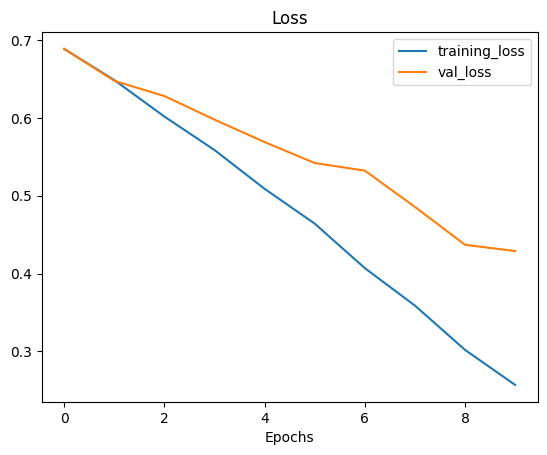

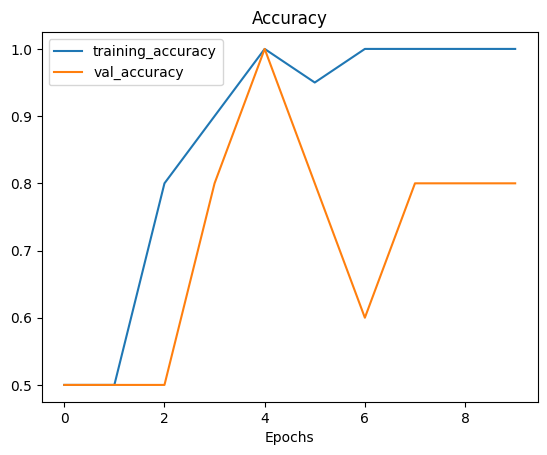

In [20]:
plot_loss_curves(history)